In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]

In [2]:
features = np.load('features_silico_dropped.npy')
features.shape

(75785, 1676)

In [3]:
classes = np.load('classes_silico.npy')
classes.shape

(75785, 71)

In [4]:
def plotDistribution(y):
    n_ones =  y.sum(axis=0)
    n_records =  y.shape[0]
    n_labels =  y.shape[1]
    plt.bar(np.arange(n_labels),n_ones)
    plt.ylim([0,n_records])
    plt.title('Number of \'1\'s in Each Label')
    plt.show()

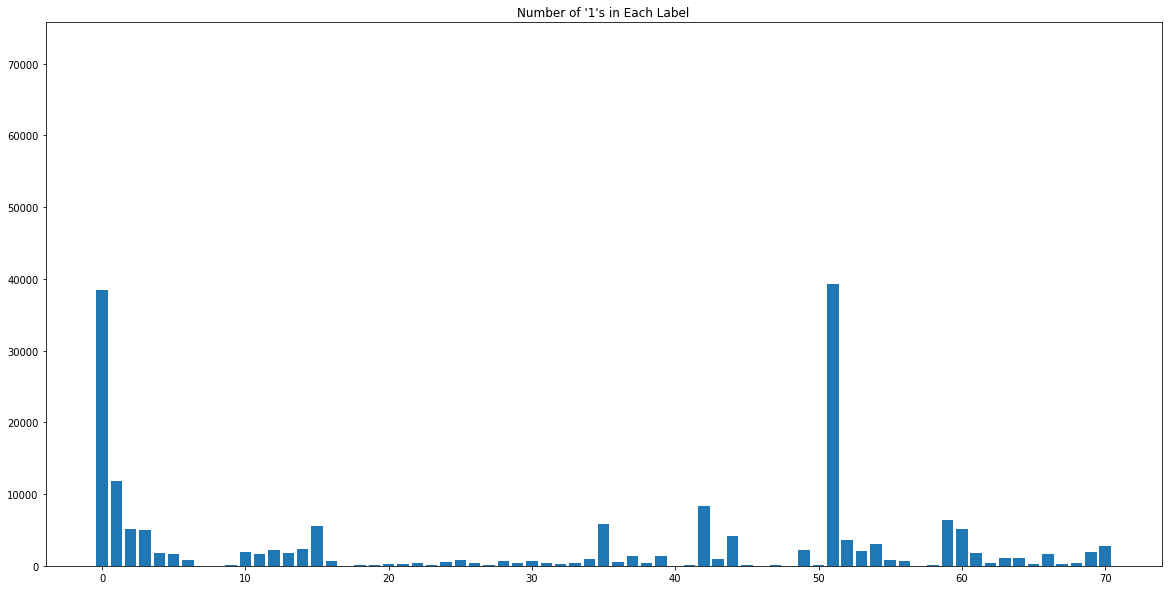

In [5]:
plotDistribution(classes)

In [6]:
def duplicateMinority(x, y):

    n = y.shape[0]
    n_pos = y.sum(axis=0)
    n_neg = n - n_pos

    minValue_pos = n_pos[n_pos != 0].min()
    minValue_neg = n_neg[n_neg != 0].min()

    new_x = x.copy()
    new_y = y.copy()
    
    if minValue_pos < minValue_neg:
        minValue = minValue_pos
        minIndex = np.where(n_pos == minValue)
        ind = np.full((n), False, dtype=bool)
        for i in minIndex[0]:
            ind = ind | (y[:,i] == 1)
        new_x = np.append(new_x, x[ind], axis=0)
        new_y = np.append(new_y, y[ind], axis=0)
    else:
        minValue = minValue_neg
        minIndex = np.where(n_neg == minValue)
        ind = np.full((n), False, dtype=bool)
        for i in minIndex[0]:
            ind = ind | (y[:,i] == 0)
        new_x = np.append(new_x, x[ind], axis=0)
        new_y = np.append(new_y, y[ind], axis=0)
            
    return new_x, new_y, ind.sum()

In [7]:
def duplicateMinorities(x, y, threshold=0.1, max_perc=0.5):
    
    new_x = x.copy()
    new_y = y.copy()
    i = 0
    
    while True:
        
        n = new_y.shape[0]
        n_pos = new_y.sum(axis=0)
        n_neg = n - n_pos

        minValue_pos = n_pos[n_pos != 0].min()
        minValue_neg = n_neg[n_neg != 0].min()

        ratio_pos = minValue_pos / n
        ratio_neg = minValue_neg / n
        
        if (ratio_pos > threshold and ratio_neg > threshold) or i/n >= max_perc:
            break;
        else:
            new_x, new_y, i_inc = duplicateMinority(new_x, new_y)
            i = i + i_inc
            print('{},{},{}'.format(ratio_pos, ratio_neg, i/n))
        
    return new_x, new_y

In [8]:
new_features, new_classes = duplicateMinorities(features, classes, max_perc=0.5)

2.6390446658309693e-05,0.4819687273207099,2.6390446658309693e-05
5.2779500442028316e-05,0.4819823980366026,0.0001319487511050708
6.596741209842338e-05,0.48202388020317966,0.00019790223629527012
0.00010554089709762533,0.4820580474934037,0.00040897097625329813
0.0001318982800464282,0.48214097288171365,0.0005407829481903556
0.00015825706222140164,0.48220926858861074,0.0006989686914778572
0.00021097602784883569,0.4821988976502545,0.0011208101479469395
0.0002504283643073679,0.4823645709766706,0.0013707657835771714
0.0002635428059402548,0.48246781483482454,0.00163396539682958
0.00031616804331502195,0.4826041707834381,0.0019497029337759686
0.0004214241502377096,0.48258333004095716,0.002791934995324826
0.0005000197376212219,0.4829137992289169,0.003289603536981723
0.0005260735187742487,0.4831196159663313,0.003814033011113303
0.0005520867564903056,0.4833913900755833,0.00436411436082813
0.000630608142727643,0.48367644547210215,0.004992314463260507
0.0008402809689489923,0.4836342151907044,0.006669

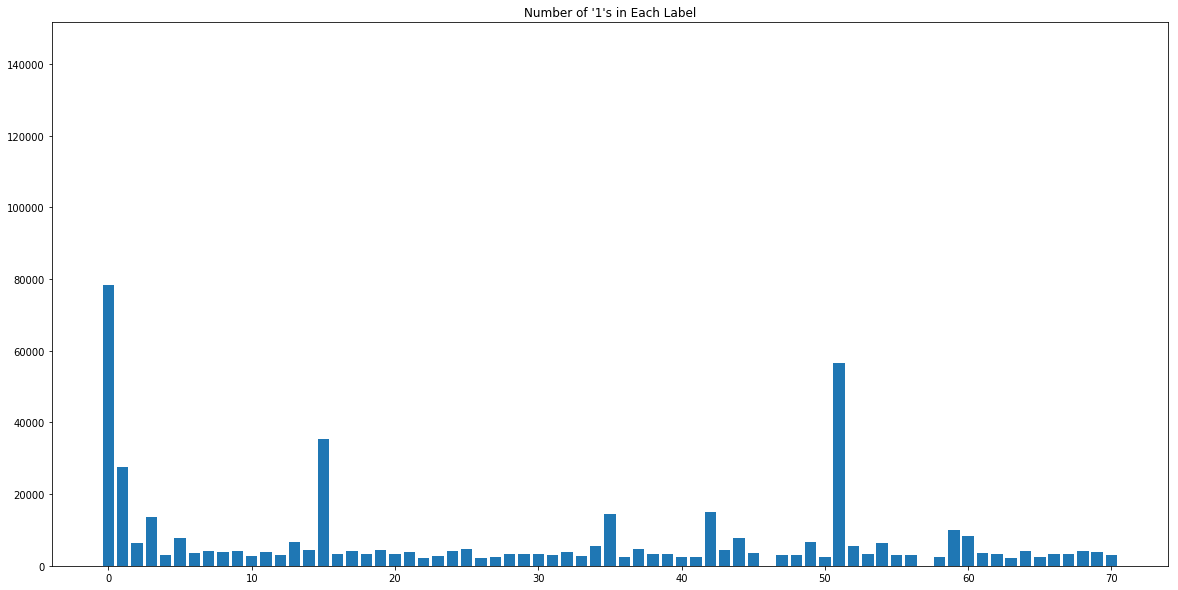

In [9]:
plotDistribution(new_classes)

In [10]:
np.save('features_silico_duplicated', new_features)

In [11]:
np.save('classes_silico_duplicated', new_classes)